In [1]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
from keras.layers import Input

In [2]:
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
input_img = keras.Input(shape=(784,))

In [3]:
(X_train, _), (X_test, _) = mnist.load_data()

In [4]:
# Cleaning and reshaping the data as required by the model
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [5]:
input_img = Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

In [6]:
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [7]:
autoencoder = keras.Model(input_img, decoded)

In [10]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
history=autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0854 - val_loss: 0.0853
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0853 - val_loss: 0.0849
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0851 - val_loss: 0.0851
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0850 - val_loss: 0.0847
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0850 - val_loss: 0.0845
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0848 - val_loss: 0.0846
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0847 - val_loss: 0.0842
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0845 - val_loss: 0.0843
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0844 - val_loss: 0.0839
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0843 - val_loss: 0.08

In [19]:
encoded_imgs = autoencoder.predict(X_test)

313/313 [==============================] - 0s 1ms/step


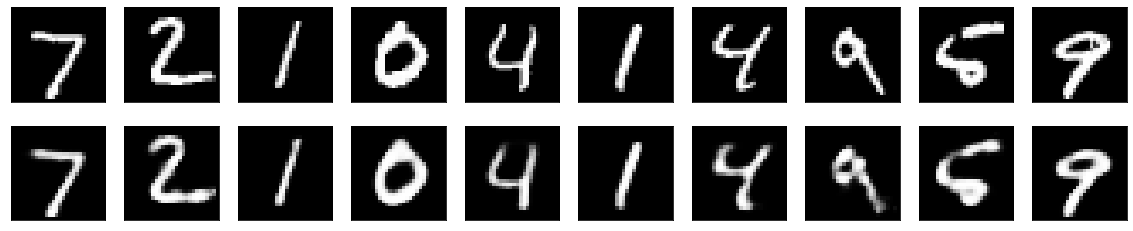

In [21]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()